In [41]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

num_tournaments = 1000
num_rounds = 'varied' #30
num_players = 13
output_dir = Path(f"C:\\output\\tournament\\{num_tournaments}_tournaments_{num_rounds}_rounds_{num_players}_players")
metrics_files = list(output_dir.glob('*_metrics_*'))

def process_file(file):
    tag = file.stem.split("_")[-1]
    metrics = pd.read_csv(file).rename(columns=lambda x: x.strip())
    metrics["tournament_id"] = tag
    return metrics

matches = pd.concat([process_file(f) for f in metrics_files])

In [42]:
process_file(metrics_files[0])

,numRounds,simMatches,player,gamesPlayed,uniquePartners,uniqueOpponents,tournament_id
0,19,3,0,18,10,12,201911211352390625
1,19,3,1,16,11,12,201911211352390625
2,19,3,2,19,10,12,201911211352390625
3,19,3,3,18,11,12,201911211352390625
4,19,3,4,18,11,12,201911211352390625
5,19,3,5,18,11,12,201911211352390625
6,19,3,6,17,9,12,201911211352390625
7,19,3,7,17,10,12,201911211352390625
8,19,3,8,16,11,12,201911211352390625
9,19,3,9,18,12,12,201911211352390625


In [33]:
def aggregate_matches(matches):
    tour_cols = ["numRounds", "simMatches", "tournament_id"]
    tournament = (matches.groupby(tour_cols)[["gamesPlayed", "uniquePartners", "uniqueOpponents"]]
                  .agg(["mean", "min", "max", "var"]))
    tournament.columns = ["_".join(col).strip() for col in tournament.columns.values]
    tournament = tournament.reset_index()
    tournament['numPlayers'] = matches.player.count()
    return tournament

tournaments = matches.groupby("tournament_id").apply(aggregate_matches).reset_index(drop=True)

In [34]:
tournaments

,numRounds,simMatches,tournament_id,gamesPlayed_mean,gamesPlayed_min,gamesPlayed_max,gamesPlayed_var,uniquePartners_mean,uniquePartners_min,uniquePartners_max,uniquePartners_var,uniqueOpponents_mean,uniqueOpponents_min,uniqueOpponents_max,uniqueOpponents_var,numPlayers
0,19,3,201911211352390625,17.538462,16,19,0.935897,10.461538,9,12,0.769231,12.000000,12,12,0.000000,13
1,15,3,201911211352392363,13.846154,12,15,0.807692,9.538462,8,12,1.102564,11.384615,10,12,0.423077,13
2,27,3,201911211352393356,24.923077,24,27,0.743590,11.230769,10,12,0.525641,11.846154,11,12,0.141026,13
3,49,3,201911211352394523,45.230769,43,47,1.525641,12.000000,12,12,0.000000,12.000000,12,12,0.000000,13
4,46,3,201911211352397957,42.461538,41,45,1.602564,11.846154,11,12,0.141026,12.000000,12,12,0.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,90,3,201911211353278973,83.076923,80,86,2.410256,12.000000,12,12,0.000000,12.000000,12,12,0.000000,13
200,18,3,201911211353283104,16.615385,16,18,0.589744,10.307692,9,11,0.730769,11.230769,10,12,0.525641,13
201,54,3,201911211353283881,49.846154,47,52,2.307692,12.000000,12,12,0.000000,12.000000,12,12,0.000000,13
202,20,3,201911211353286313,18.461538,17,20,0.935897,10.461538,9,11,0.435897,11.230769,10,12,0.692308,13


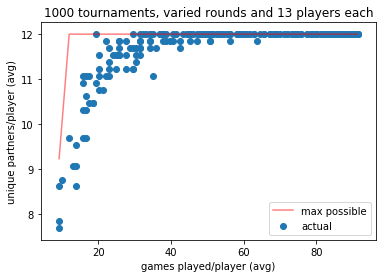

In [40]:
tournaments["max_possible_unique_partners"] = (tournaments[['numPlayers', 'gamesPlayed_mean']]
                                               .apply(lambda x: min(x.numPlayers-1, x.gamesPlayed_mean), axis=1))
possible = tournaments[['gamesPlayed_mean', 'max_possible_unique_partners']].sort_values('gamesPlayed_mean')
plt.plot(possible.gamesPlayed_mean, possible.max_possible_unique_partners, color="red", alpha=0.5,  
           label="max possible")
plt.scatter(tournaments.gamesPlayed_mean, tournaments.uniquePartners_mean, label='actual')

plt.title(f"{num_tournaments} tournaments, {num_rounds} rounds and {num_players} players each")
plt.xlabel("games played/player (avg)")
plt.ylabel("unique partners/player (avg)")
plt.legend()

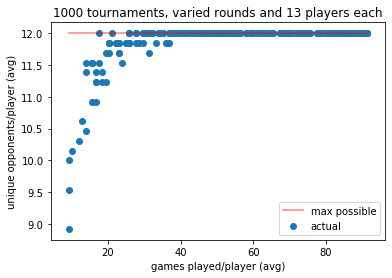

In [38]:
tournaments["max_possible_unique_opponents"] = (tournaments[['numPlayers', 'gamesPlayed_mean']]
                                               .apply(lambda x: min(x.numPlayers-1, x.gamesPlayed_mean*2), axis=1))
possible = tournaments[['gamesPlayed_mean', 'max_possible_unique_opponents']].sort_values('gamesPlayed_mean')
plt.plot(possible.gamesPlayed_mean, possible.max_possible_unique_opponents, color="red", alpha=0.5,  
           label="max possible")
plt.scatter(tournaments.gamesPlayed_mean, tournaments.uniqueOpponents_mean, label='actual')

plt.title(f"{num_tournaments} tournaments, {num_rounds} rounds and {num_players} players each")
plt.xlabel("games played/player (avg)")
plt.ylabel("unique opponents/player (avg)")
plt.legend()

In [18]:
tournaments[['numPlayers', 'gamesPlayed_mean']].apply(lambda n: print(n.numPlayers), axis=1)

38.0
27.0
48.0
56.0
11.0
32.0
45.0
31.0
15.0
69.0
61.0
42.0
68.0
42.0
55.0
51.0
19.0
58.0
27.0
61.0
51.0
64.0
31.0
18.0
94.0
66.0
94.0
96.0
83.0
48.0
23.0
21.0
38.0
18.0
60.0
65.0
53.0
53.0
31.0
40.0
59.0
44.0
97.0
87.0
98.0
56.0
92.0
39.0
21.0
70.0
27.0
92.0
34.0
43.0
87.0
74.0
95.0
37.0
61.0
45.0
38.0
49.0
47.0
67.0
54.0
48.0
11.0
57.0
82.0
90.0
97.0
65.0
34.0
87.0
10.0
15.0
66.0
44.0
20.0
45.0
73.0
63.0
82.0
21.0
28.0
31.0
86.0
95.0
30.0
86.0
70.0
24.0
91.0
86.0
10.0
17.0
96.0
38.0
41.0
57.0


0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [12]:
tournaments[tournaments.gamesPlayed_mean >= tournaments.numPlayers]

,numRounds,simMatches,tournament_id,gamesPlayed_mean,gamesPlayed_min,gamesPlayed_max,gamesPlayed_var,uniquePartners_mean,uniquePartners_min,uniquePartners_max,uniquePartners_var,uniqueOpponents_mean,uniqueOpponents_min,uniqueOpponents_max,uniqueOpponents_var,numPlayers,max_possible_unique_partners
4,30,2,201911210941093111,21.818182,20,23,0.763636,10.0,10,10,0.000000,10.000000,10,10,0.000000,11,10
8,30,2,201911210941094593,16.000000,15,17,0.285714,13.2,12,14,0.314286,13.066667,12,14,0.495238,15,14
66,30,2,201911210941100854,21.818182,20,23,0.763636,10.0,10,10,0.000000,10.000000,10,10,0.000000,11,10
74,30,2,201911210941103363,24.000000,23,25,0.444444,8.6,8,9,0.266667,9.000000,9,9,0.000000,10,9
75,30,2,201911210941104515,16.000000,15,17,0.428571,12.8,12,14,0.457143,12.533333,11,14,0.695238,15,14
94,30,2,201911210941107285,24.000000,23,25,0.666667,9.0,9,9,0.000000,9.000000,9,9,0.000000,10,9


In [6]:
tournaments[tournaments.gamesPlayed_mean > tournaments.uniquePartners_mean].numPlayers.describe()

count     6.000000
mean     12.000000
std       2.366432
min      10.000000
25%      10.250000
50%      11.000000
75%      14.000000
max      15.000000
Name: numPlayers, dtype: float64

In [7]:
tournaments[tournaments.gamesPlayed_mean <= tournaments.uniquePartners_mean].numPlayers.describe()

count    94.000000
mean     55.744681
std      24.058592
min      17.000000
25%      38.000000
50%      53.500000
75%      72.250000
max      98.000000
Name: numPlayers, dtype: float64